# Classifying Wine Type using Physicochemical Properties

Wordcount: 1850

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(knitr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.8      ✔ rsample   0.0.7 
✔ infer     0.5.3      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.1.3 
✔ parsnip   0.1.3    

_____________________________________________________________________________________________________________________
**Introduction**

*Background*

Wine has a wide variety of physicochemical properties that differ with grape type, fermentation process, and age. These properties are used to classify wine quality and type. One of these properties is chloride content, the amount of salt in wine. It tends to be higher in red wine due to the extraction of the grape skin during fermentation (https://www.awri.com.au/wp-content/uploads/2018/08/s1530.pdf). Another property is total sulfur dioxide, which tends to be higher in white wine to prevent it from browning and microbe spoilage. The northwestern Portuguese wine, Vinho Verde, has red and white variants. With greater volumes, classifying wine type has become increasingly important in certifying and selling the wines (https://www.winesofportugal.info/pagina.php?codNode=3889). 
 
*Question*

Based on chloride and total sulfur dioxide content, can we predict the wine type (red or white) of an unspecified Vinho Verde wine?
 
*Dataset Description*

The two datasets, downloaded from http://archive.ics.uci.edu/ml/datasets/Wine+Quality, include the physicochemical properties of Vinho Verde red and white wine. Both datasets, winequality-red.csv and winequality-white.csv, will be used to perform the classification. The data frames have semicolon-separated values and column names of the physicochemical properties (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol) and an output column of wine quality.

_____________________________________________________________________________________________________________________

**Preliminary Exploratory Data Analysis**

*Reading the Data into R*

First we read both datasets into R. We also made sure to modify our column names so they are compatible with R by replacing spaces with periods. 

In [2]:
url_red <- "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
red_data <- read_delim(url_red, delim = ";", col_names = TRUE) 
colnames(red_data) <- make.names(colnames(red_data))
head(red_data)

url_white <- "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
white_data <- read_delim(url_white, delim = ";", col_names = TRUE)
colnames(white_data) <- make.names(colnames(white_data))
head(white_data)

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)



fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)



fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


_____________________________________________________________________________________________________________________
Above we can see we have two data tables, however for ease of use we would like to combine them into one table. Prior to doing so, we must add a column to each table designating the type of wine it corresponds to (Red or White). This will ensure that we can differentiate between the Red and White wines in the merged dataset.
_____________________________________________________________________________________________________________________

In [3]:
red_data_2 <- add_column (red_data, type = "Red")
head(red_data_2)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,Red
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,Red
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,Red
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,Red


In [4]:
white_data_2 <- add_column (white_data, type = "White")
head(white_data_2)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,White
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6,White
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,White
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,White
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,White
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,White


_____________________________________________________________________________________________________________________
We then merged the two data tables into one with the same column names. 
_____________________________________________________________________________________________________________________

In [5]:
wine_data <- rbind(red_data_2, white_data_2) %>%
    mutate(type = as_factor(type))
head(wine_data)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,Red
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,Red
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,Red
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,Red


_____________________________________________________________________________________________________________________
We then checked to see if there is any missing data in our dataset. From the table below, we see that each output is returned as false, therefore our dataset is complete.
_____________________________________________________________________________________________________________________

In [6]:
wine_nas <- map_df(wine_data, ~ any(is.na(.x)))
wine_nas

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


_____________________________________________________________________________________________________________________
*Exploring Physicochemical Properties*

We then split the data into training and testing sets for further exploration. 
_____________________________________________________________________________________________________________________

In [7]:
set.seed(1)

wine_split <- initial_split(wine_data, prop = 0.75, strata = type)  
wine_training <- training(wine_split)   
wine_testing <- testing(wine_split)

_____________________________________________________________________________________________________________________
We calculated the maximun, minimum, and average values of each of the property in red and white wines to observe their distributions compared to one another. This way, we can detect which properties play bigger roles in differentiating the two wine types.
_____________________________________________________________________________________________________________________

In [8]:
red_max <- wine_training %>% 
    filter (type == "Red")%>%
    select (-type)%>%
    map_df(~max(., na.rm  = TRUE))
white_max <- wine_training %>% 
    filter (type == "White")%>%
    select (-type)%>%
    map_df(~max(., na.rm  = TRUE))
red_max
white_max

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15.6,1.58,1,15.5,0.611,72,289,1.00369,4.01,2,14,8


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14.2,1.1,1.66,65.8,0.346,289,440,1.03898,3.82,1.08,14.05,9


In [9]:
red_min <- wine_training %>% 
    filter (type == "Red")%>%
    select (-type)%>%
    map_df(~min(., na.rm  = TRUE))
white_min <- wine_training %>% 
    filter (type == "White")%>%
    select (-type)%>%
    map_df(~min(., na.rm  = TRUE))
red_min
white_min

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.6,0.12,0,0.9,0.012,1,6,0.99007,2.74,0.33,8.4,3


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.8,0.08,0,0.6,0.009,2,9,0.98713,2.72,0.23,8,3


In [10]:
red_mean <- wine_training %>% 
    filter (type == "Red")%>%
    select (-type)%>%
    map_df(~mean(., na.rm  = TRUE))
white_mean <- wine_training %>% 
    filter (type == "White")%>%
    select (-type)%>%
    map_df(~mean(., na.rm  = TRUE))
red_mean
white_mean

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.272667,0.5314292,0.2676917,2.5455,0.08719833,15.83542,46.49583,0.9967286,3.31665,0.6573583,10.42613,5.6325


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6.849279,0.2779736,0.3353185,6.397972,0.04562548,35.30117,138.0992,0.9940228,3.187412,0.4892678,10.51788,5.881873


_____________________________________________________________________________________________________________________
We chose total.sulfur.dioxide as it shows greatest difference: white wine has a much larger range for total.sulfur.dioxide than red wine. Chlorides and residual.sugar also showed notable differences but we chose chlorides as it has smaller variability, which means chlorides has a smaller standard deviation and  smaller chance of having outliers. We want the data to be more consistent for higher accuracy when predicting, so, chlorides would be a better choice. To condense our dataset, we limited it to the inputs; chlorides and total.sulfur.dioxide, and output; type.
_____________________________________________________________________________________________________________________

In [11]:
wine_train <- select(wine_training, chlorides, total.sulfur.dioxide, type)
head(wine_train)

chlorides,total.sulfur.dioxide,type
<dbl>,<dbl>,<fct>
0.076,34,Red
0.098,67,Red
0.092,54,Red
0.075,60,Red
0.075,40,Red
0.069,59,Red


_____________________________________________________________________________________________________________________
We then calculated the number of observations of each wine type to check if our data is balanced. The data amount for white wine is ~3 times that of red wine. From this, we deduced that we have to balance our training data for our model to accurately classify wine type prior to using K-NN classification.
_____________________________________________________________________________________________________________________

In [12]:
count_train <- wine_train %>%
    group_by(type) %>%
    summarize(n=n())
count_train

`summarise()` ungrouping output (override with `.groups` argument)



type,n
<fct>,<int>
Red,1200
White,3674


_____________________________________________________________________________________________________________________
*Visualization of Training Set*

We plotted total.sulfur.dioxide vs. chlorides and differentiated by wine type. In the scatter plot below, we observe that white wine has higher total sufur dioxide content and lower chloride content compared to red wine, implying the predictive question proposed is plausible. We can see that the distribution of total sulfur dioxide is uniform while the distribution of chlorides is unimodal and skewed to the right due to its greater variability and outliers. 
_____________________________________________________________________________________________________________________

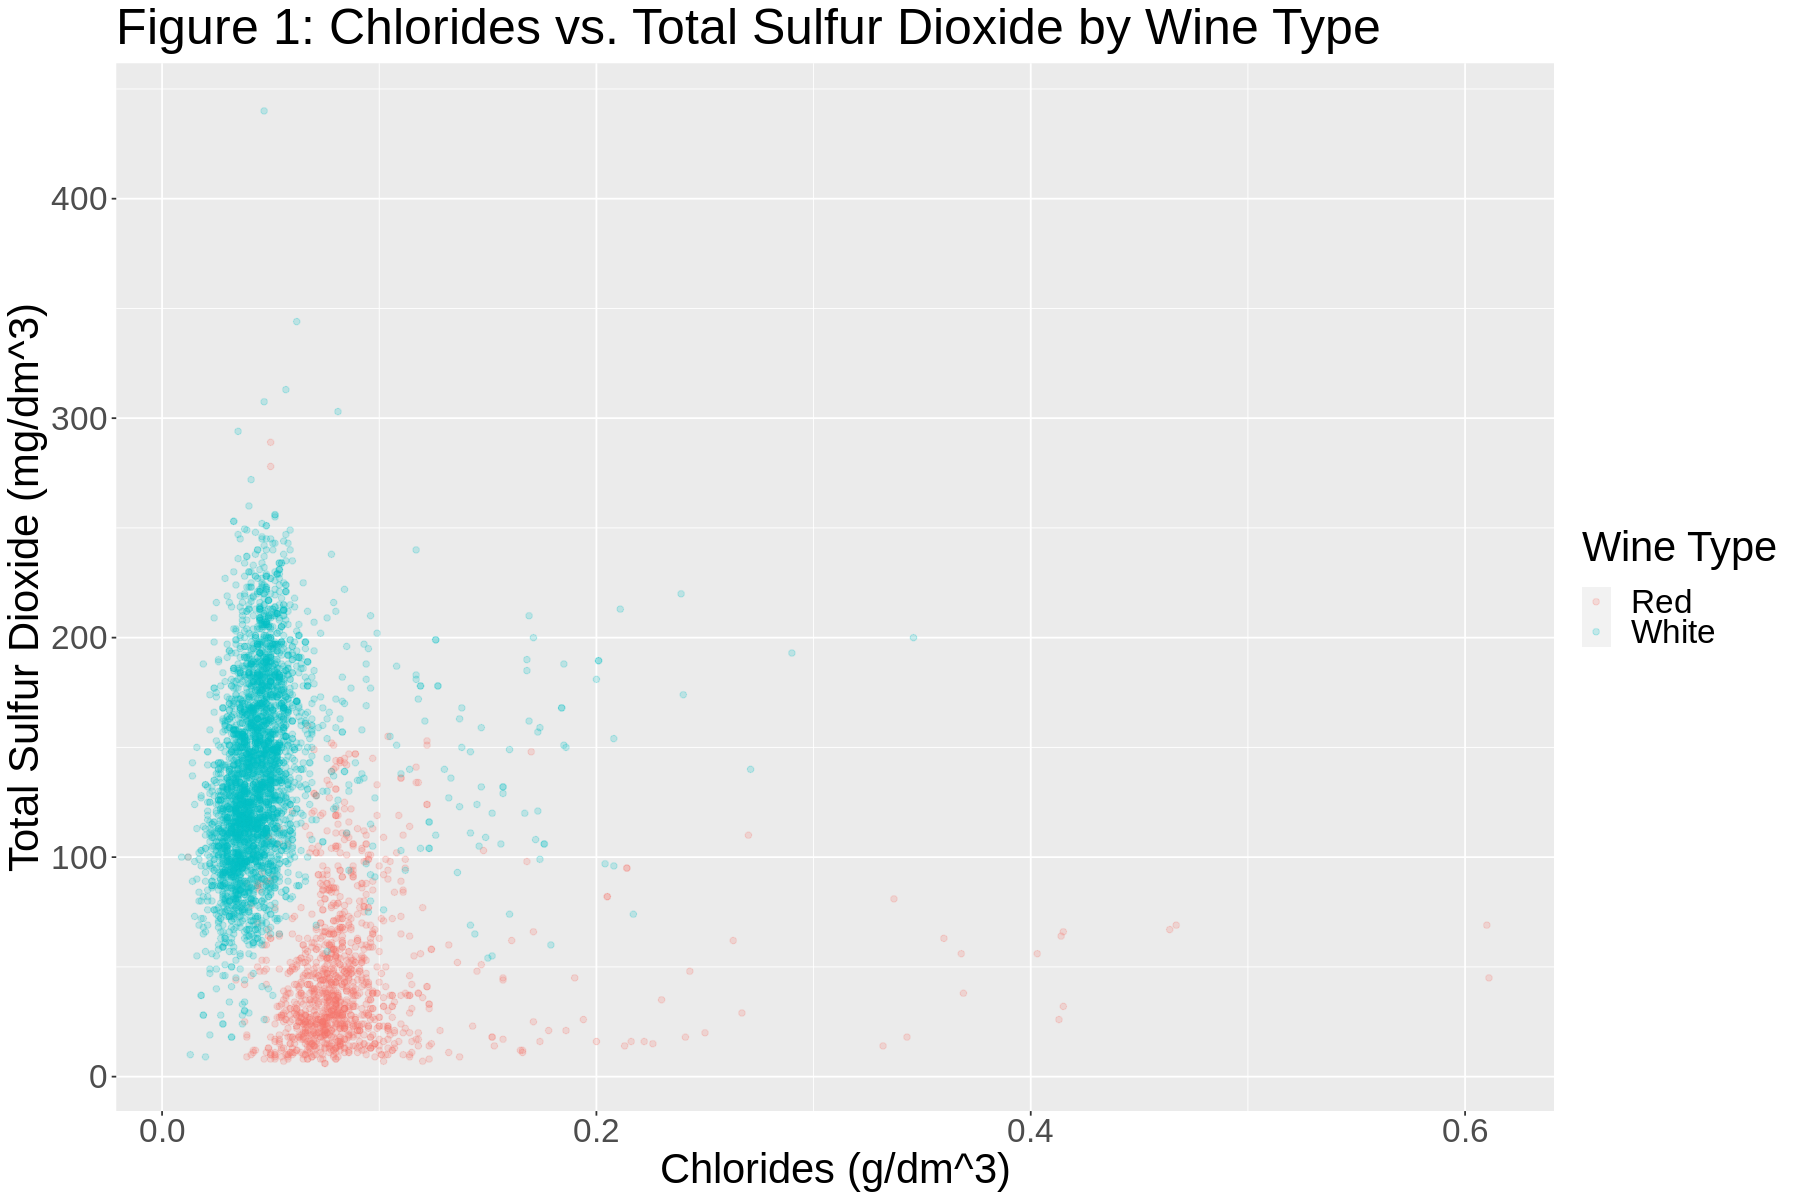

In [13]:
options(repr.plot.width = 15, repr.plot.height = 10)
wine_plot <- wine_train %>%
    ggplot(aes(x = chlorides, y = total.sulfur.dioxide, colour = type))+
    geom_point(alpha=0.2)+
    labs(x = "Chlorides (g/dm^3)", y = "Total Sulfur Dioxide (mg/dm^3)", colour = "Wine Type")+
    ggtitle("Figure 1: Chlorides vs. Total Sulfur Dioxide by Wine Type") +
    theme(text = element_text(size = 25))
wine_plot

_____________________________________________________________________________________________________________________
The plot below is almost the same as above, however we have excluded some outliers to allow for better visualization. 
_____________________________________________________________________________________________________________________

Warning message:
“Removed 16 rows containing missing values (geom_point).”


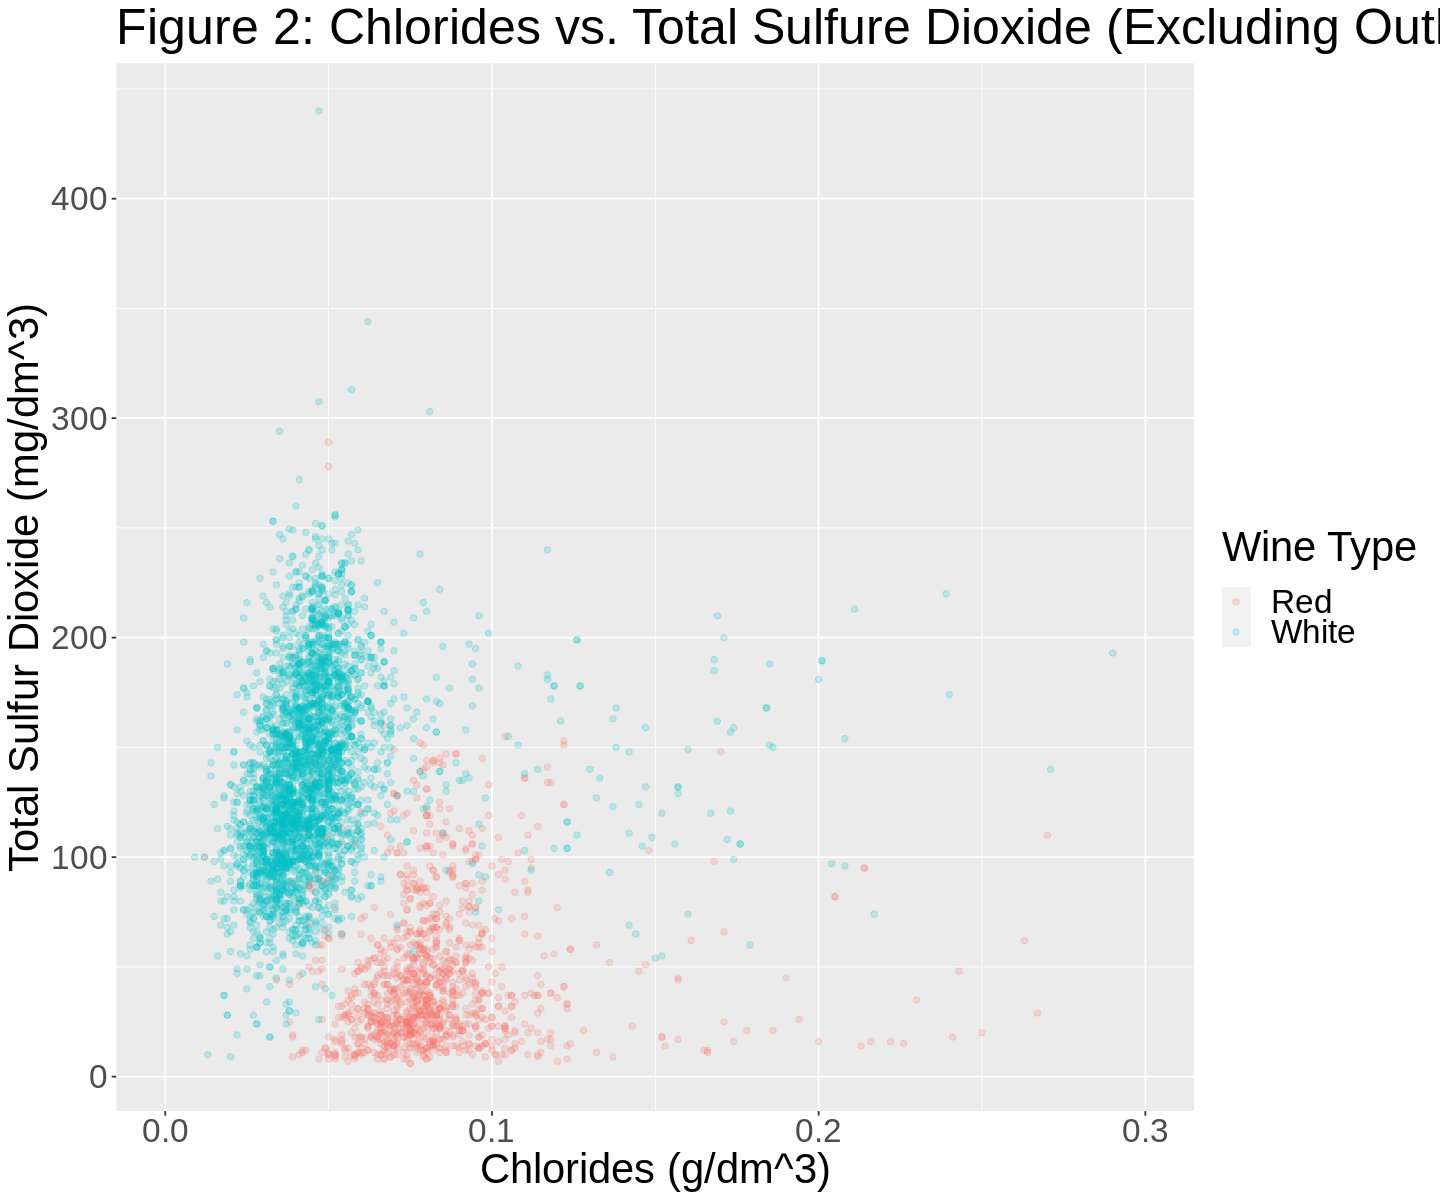

In [14]:
options(repr.plot.width = 12, repr.plot.height = 10)

wine_plot_focalized <- wine_train %>%
    ggplot(aes(x = chlorides, y = total.sulfur.dioxide, colour = type))+
    geom_point(alpha=0.2)+
    labs(x = "Chlorides (g/dm^3)", y = "Total Sulfur Dioxide (mg/dm^3)", colour = "Wine Type")+
    ggtitle("Figure 2: Chlorides vs. Total Sulfure Dioxide (Excluding Outliers)") +
    theme(text = element_text(size = 25)) +
    scale_x_continuous(limits= c(0,0.3))
wine_plot_focalized

_____________________________________________________________________________________________________________________
**Methods**

*Estimate of Cleaning and Data Wrangling*

Shown above:

After the data sets were imported, the column names were modified by switching spaces with dots. In order to analyze the datasets, we decided to create a new column in the two datasets and inputted the value “Red” and “White” to specify the wine type. After merging the two datasets together, the final dataset was spilt into two, training being three quarters of the data and testing being the remaining quarter of the data. The mean, min and max value of the training data was used to determine our differentiating properties for analysis of both types of wine.


*Data Analysis and Variables/Columns Used*

In order to further analyze the data we decided to select the chlorides (g/dm^3), total.sulfur.dioxide (mg/dm^3), and type columns. The selection of these three columns allowed us to reduce the dataset to contain only the data we are interested in. The chlorides and sulfur dioxide columns will allow us to predict the type of wine. We then visualized the data using ggplot2.

Upon further analysis of the data, it was discovered that there were three times the amount of data for white wine than red wine. We decided to use step_upsample in order to increase the amount of red wine data. Then we verified to ensure that we had equal number of white wine data as red wine data. We then used KNN classification in order to predict the best K value. Scaling our data also helped to ensure that there is no bias present when predicting results. We used the training dataset in order to build our model. Cross-validation of our data helped find the best K value for our data set and we determined the prediction accuracy using our testing set. 

*Visualization of Results*

Then we used a scatter plot in order to understand the predictions of the model. Our scatter plot had each type of wine assigned to a colour, we also plotted the point which we are trying to predict in order to understand where the data point stands and visualize the prediction. In order to understand our data better, we decided to make a stacked bar plot to represent the proportion of wines our model predicted correctly for each wine type.
_____________________________________________________________________________________________________________________

**KNN Classification**

We utilized step_upsample to balance our data. Our red wine data increased 1200 to 3674 to match the white wine data.

In [15]:
ups_wine_recipe <- recipe(type ~., data = wine_train) %>%
                   step_upsample(type, over_ratio = 1, skip = FALSE) %>%
                   prep()
ups_wine <- bake(ups_wine_recipe, wine_train)

ups_wine_count <- ups_wine %>%
                  group_by(type) %>%
                  summarize(n = n())
ups_wine_count

Warning message:
“`step_upsample()` is deprecated as of recipes 0.1.13.
Please use `themis::step_upsample()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
`summarise()` ungrouping output (override with `.groups` argument)



type,n
<fct>,<int>
Red,3674
White,3674


We then scaled and centered our predictors and tuned our model to find the best k. 

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,binary,0.9882960,10,0.0011516160,Model1
2,roc_auc,binary,0.9898223,10,0.0011709860,Model1
3,accuracy,binary,0.9795881,10,0.0012643790,Model2
3,roc_auc,binary,0.9926738,10,0.0011392709,Model2
5,accuracy,binary,0.9778177,10,0.0015185806,Model3
5,roc_auc,binary,0.9940885,10,0.0007915394,Model3
7,accuracy,binary,0.9770018,10,0.0013513922,Model4
7,roc_auc,binary,0.9948246,10,0.0006133610,Model4
9,accuracy,binary,0.9744165,10,0.0013843414,Model5


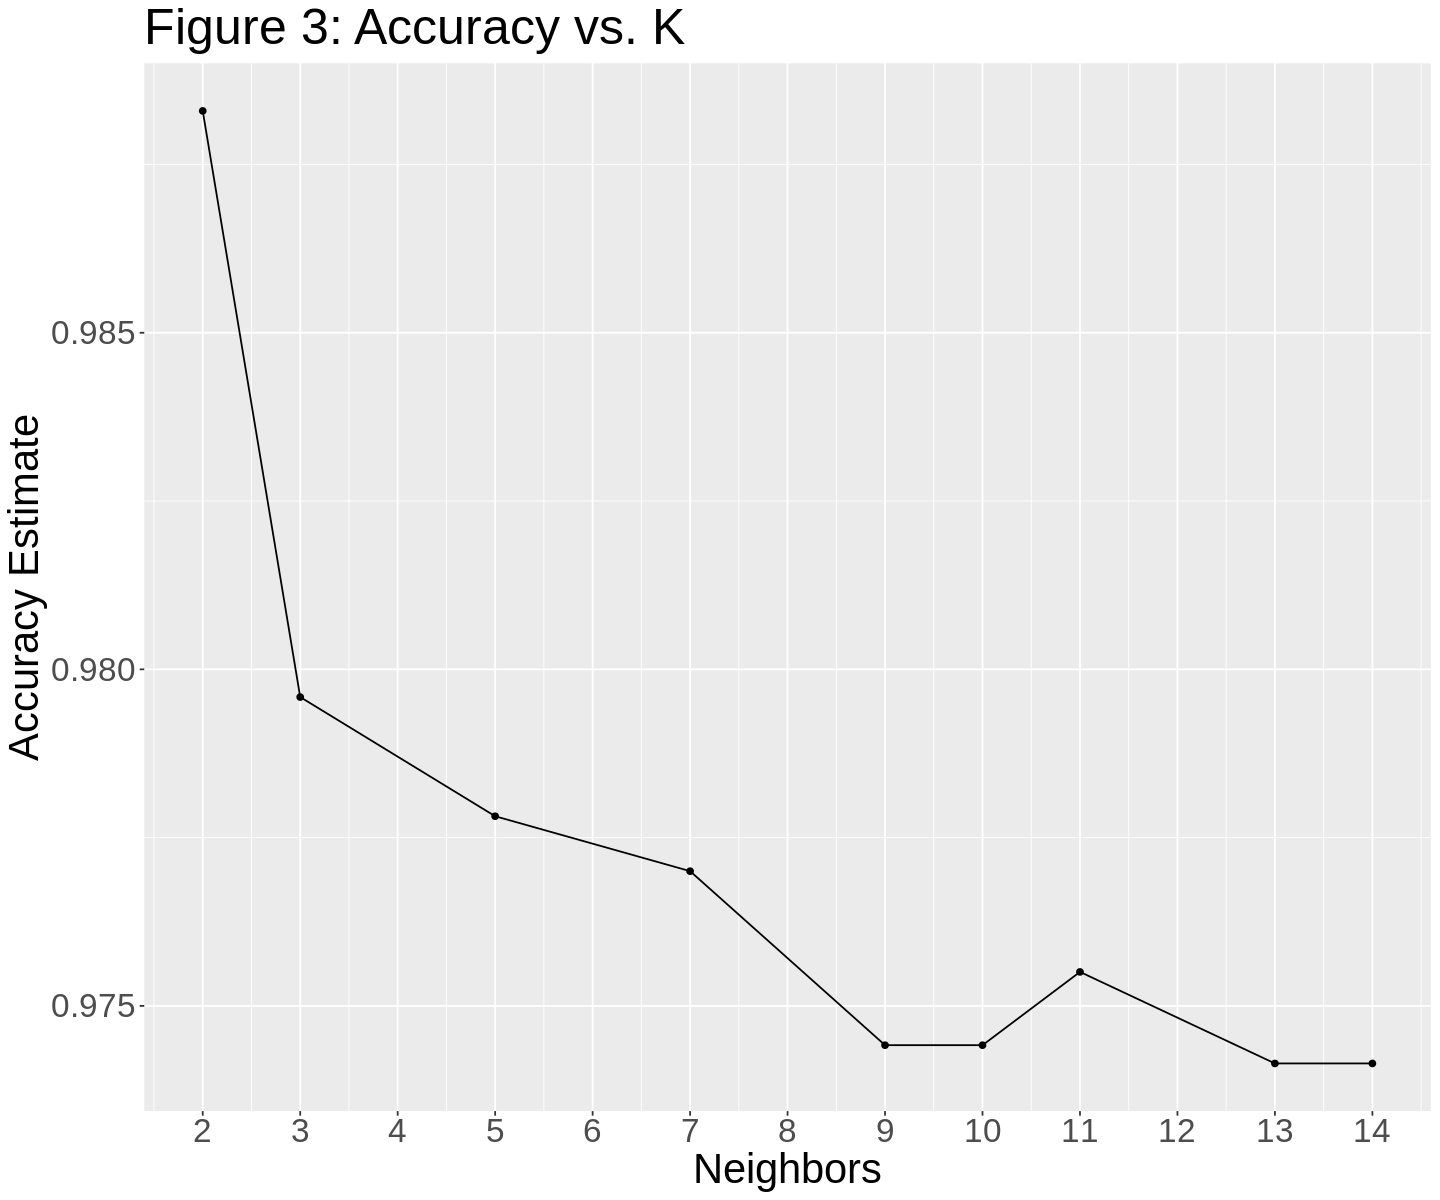

In [16]:
wine_recipe <- recipe(type~., data = ups_wine) %>%
                 step_scale(all_predictors()) %>%
                 step_center(all_predictors())


knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

wine_vfold <- vfold_cv(ups_wine, v = 10, strata = type)

knn_results <- workflow() %>%
               add_recipe(wine_recipe) %>%
               add_model(knn_tune) %>%
               tune_grid(resamples = wine_vfold, grid = 10) %>%
               collect_metrics()
knn_results


accuracies <- knn_results %>%
              filter(.metric == "accuracy") 

accuracies_vs_k <- ggplot(accuracies, aes (x = neighbors, y = mean)) +
                   geom_point() +
                   geom_line() +
                   labs (x = "Neighbors", y = "Accuracy Estimate")+
                   ggtitle("Figure 3: Accuracy vs. K") +
                   theme(text = element_text(size = 25)) +
                   scale_x_continuous(breaks=1:14) 

accuracies_vs_k

The above plot depicts a negative relationship between neighbours and accuracy. The plot helps us visualize the accuracy for the neighbours which tune_grid() tried. We can see that the best accuracy occurs at K = 2. 

In [17]:
gridvals <- tibble(neighbors = seq(1, 20))

knn_r <- workflow() %>%
         add_recipe(wine_recipe) %>%
         add_model(knn_tune) %>%
         tune_grid(resamples = wine_vfold, grid = gridvals) %>%
         collect_metrics() %>%
         filter(.metric == 'accuracy') %>%
         arrange(mean)
knn_r

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
16,accuracy,binary,0.9738716,10,0.001717245,Model16
15,accuracy,binary,0.9740074,10,0.001748970,Model15
19,accuracy,binary,0.9741441,10,0.001670649,Model19
20,accuracy,binary,0.9741441,10,0.001670649,Model20
13,accuracy,binary,0.9741452,10,0.001605652,Model13
14,accuracy,binary,0.9741452,10,0.001605652,Model14
18,accuracy,binary,0.9742799,10,0.001736564,Model18
17,accuracy,binary,0.9744162,10,0.001716598,Model17
9,accuracy,binary,0.9744165,10,0.001384341,Model09


Since all the accuracies were quite high and there was only about a 0.001 difference, we tried k values from 1 to 20 to test the validity of an accuracy of 0.9884 when k = 2. The table above shows that all accuracies only differ by 0.001 or less and k = 2 was indeed the highest in accuracy.

In [18]:
k_max <- knn_results %>%
         filter(.metric == "accuracy") %>%
         filter(mean == max(mean)) %>%
         pull(neighbors)
k_max
         
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_max) %>%
            set_engine("kknn") %>%
            set_mode("classification")

wine_fit <- workflow() %>%
            add_recipe(wine_recipe) %>%
            add_model(knn_spec) %>%
            fit(data = ups_wine)

wine_prediction <- predict(wine_fit, wine_testing) %>%
                   bind_cols(wine_testing)

wine_prediction_accuracy <- wine_prediction %>%
                            metrics(truth = type, estimate = .pred_class)

wine_prediction_accuracy

[1] 2

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9691929
kap,binary,0.9171983


The above code shows the accuracy of our model when fitted with the training set. We see that we achieved a high accuracy of 0.9691 with k = 2.

In [19]:
knn_spec_200 <- nearest_neighbor(weight_func = "rectangular", neighbors = 200) %>%
            set_engine("kknn") %>%
            set_mode("classification")

wine_fit_200 <- workflow() %>%
            add_recipe(wine_recipe) %>%
            add_model(knn_spec_200) %>%
            fit(data = ups_wine)

wine_prediction_200 <- predict(wine_fit_200, wine_testing) %>%
                   bind_cols(wine_testing)

wine_prediction_accuracy_200 <- wine_prediction_200 %>%
                            metrics(truth = type, estimate = .pred_class)
wine_prediction_accuracy_200

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9605669
kap,binary,0.8972990


Since our accuracy was very high, we tested a K = 200, in order to rule out a higher value being the best K. Upon the testing, we discovered that the accuracy is similar to the K value we previously chose.

Below we made a bar plot to visualize how well our classification predicted on our testing data. 

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



wine_testing.type,n,prediction
<fct>,<int>,<chr>
Red,376,correct
White,1197,correct
Red,23,wrong
White,27,wrong


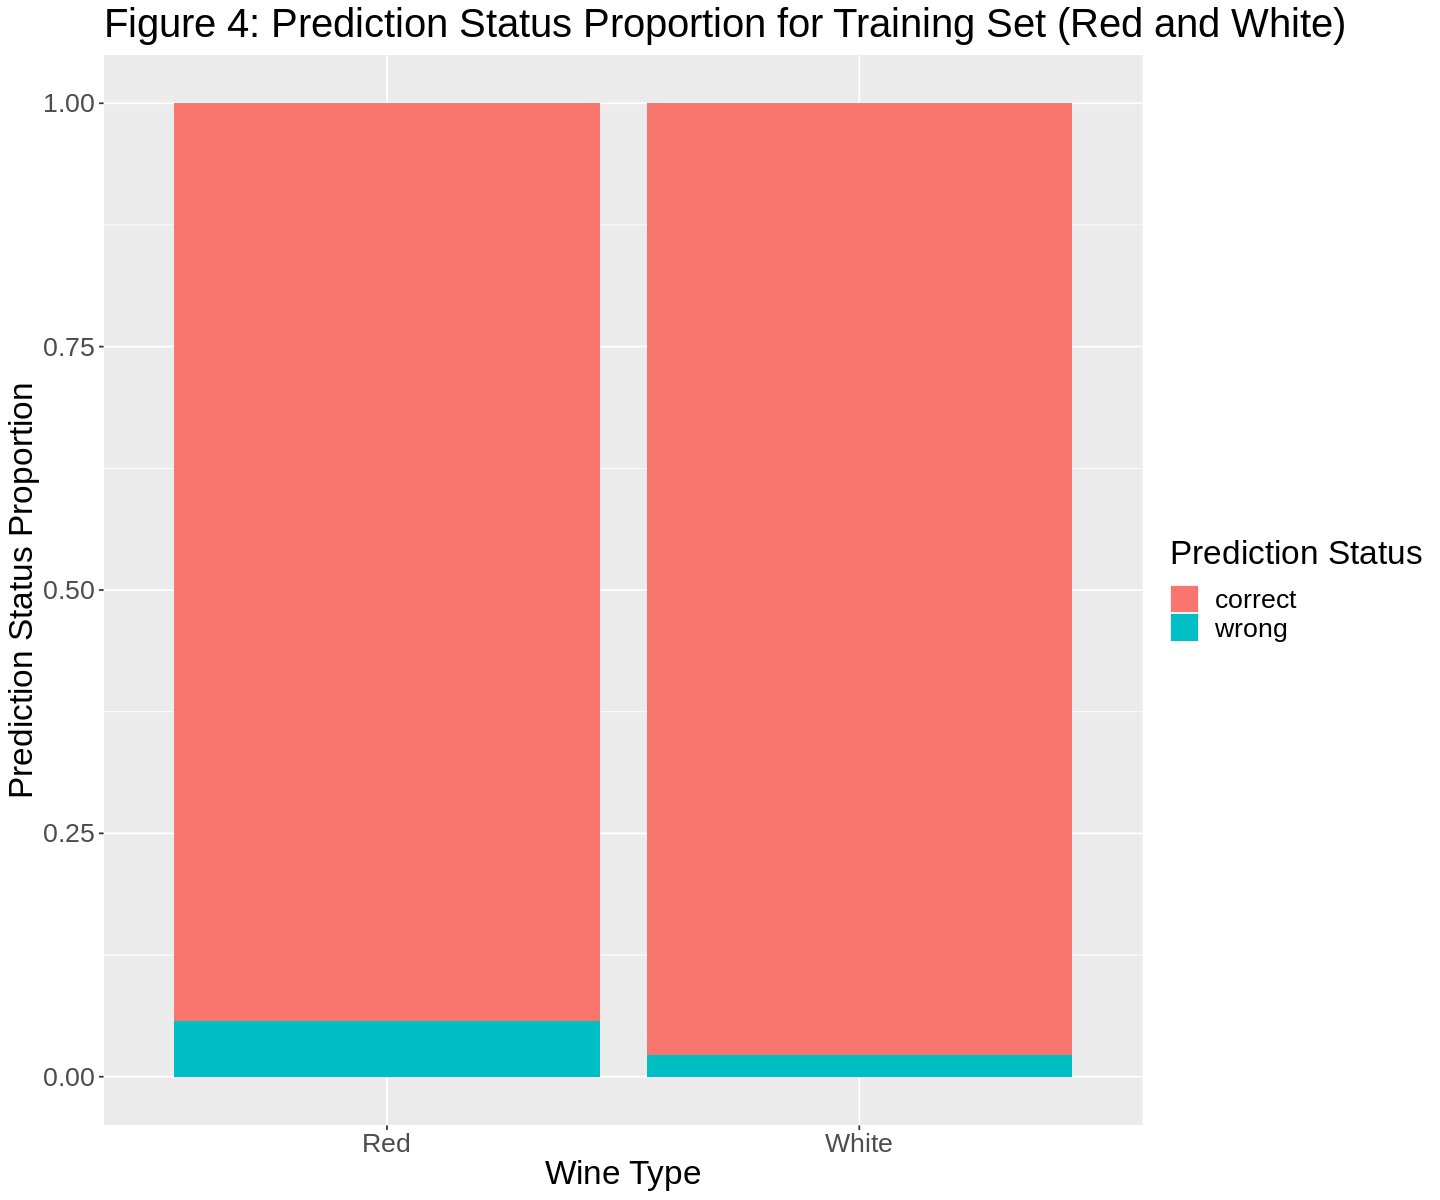

In [22]:
wine_predict_correct <- data.frame(seq(wine_prediction$type), wine_prediction$.pred_class, wine_testing$type) %>%
                        filter(wine_prediction..pred_class == wine_testing.type) %>%
                        group_by(wine_testing.type) %>%
                        summarize(n = n())
wine_predict_correct2 <- add_column(wine_predict_correct, prediction = 'correct')

wine_predict_wrong <- data.frame(seq(wine_prediction$type), wine_prediction$.pred_class, wine_testing$type) %>%
                        filter(wine_prediction..pred_class != wine_testing.type) %>%
                        group_by(wine_testing.type) %>%
                        summarize(n = n())
                        
wine_predict_wrong2 <- add_column(wine_predict_wrong, prediction = 'wrong')

combined_predict <- rbind(wine_predict_correct2, wine_predict_wrong2)
                    
combined_predict

plot <- combined_predict %>%
        ggplot(aes(x = wine_testing.type, y = n, fill = prediction)) +
        geom_bar(stat = 'identity', position = 'fill') +
        labs(x = "Wine Type", y = "Prediction Status Proportion", fill = 'Prediction Status'
            , title = "Figure 4: Prediction Status Proportion for Training Set (Red and White)") +
        theme(text = element_text(size = 20)) 

plot

The bar plot above shows the percentage of correctly and incorrectly predicted wine types for Red and White wine, respectively. A larger percentage of White wine was predicted correctly, this may have been due to the data size. The White wine testing data was 3 times larger than Red wine therefore the model had more data to work with to predict the wine type. 

To see how our model generalized to wines other than Vinho Verde, we found typical chloride and total sulfur dioxide content of Cabernet Sauvignon, a red wine from the southwest of France (https://www.ajevonline.org/content/early/2020/04/25/ajev.2020.19083, https://www.scielo.br/scielo.php?%20script=sci_arttext&pid=S0101-20612015000100095). We took mean values of chloride and total sulfur dioxide and predicted it with our model.

chlorides,total.sulfur.dioxide,type
<dbl>,<dbl>,<chr>
0.095,50,Red


.pred_class,chlorides,total.sulfur.dioxide,type
<fct>,<dbl>,<dbl>,<chr>
Red,0.095,50,Red


Warning message:
“Removed 54 rows containing missing values (geom_point).”


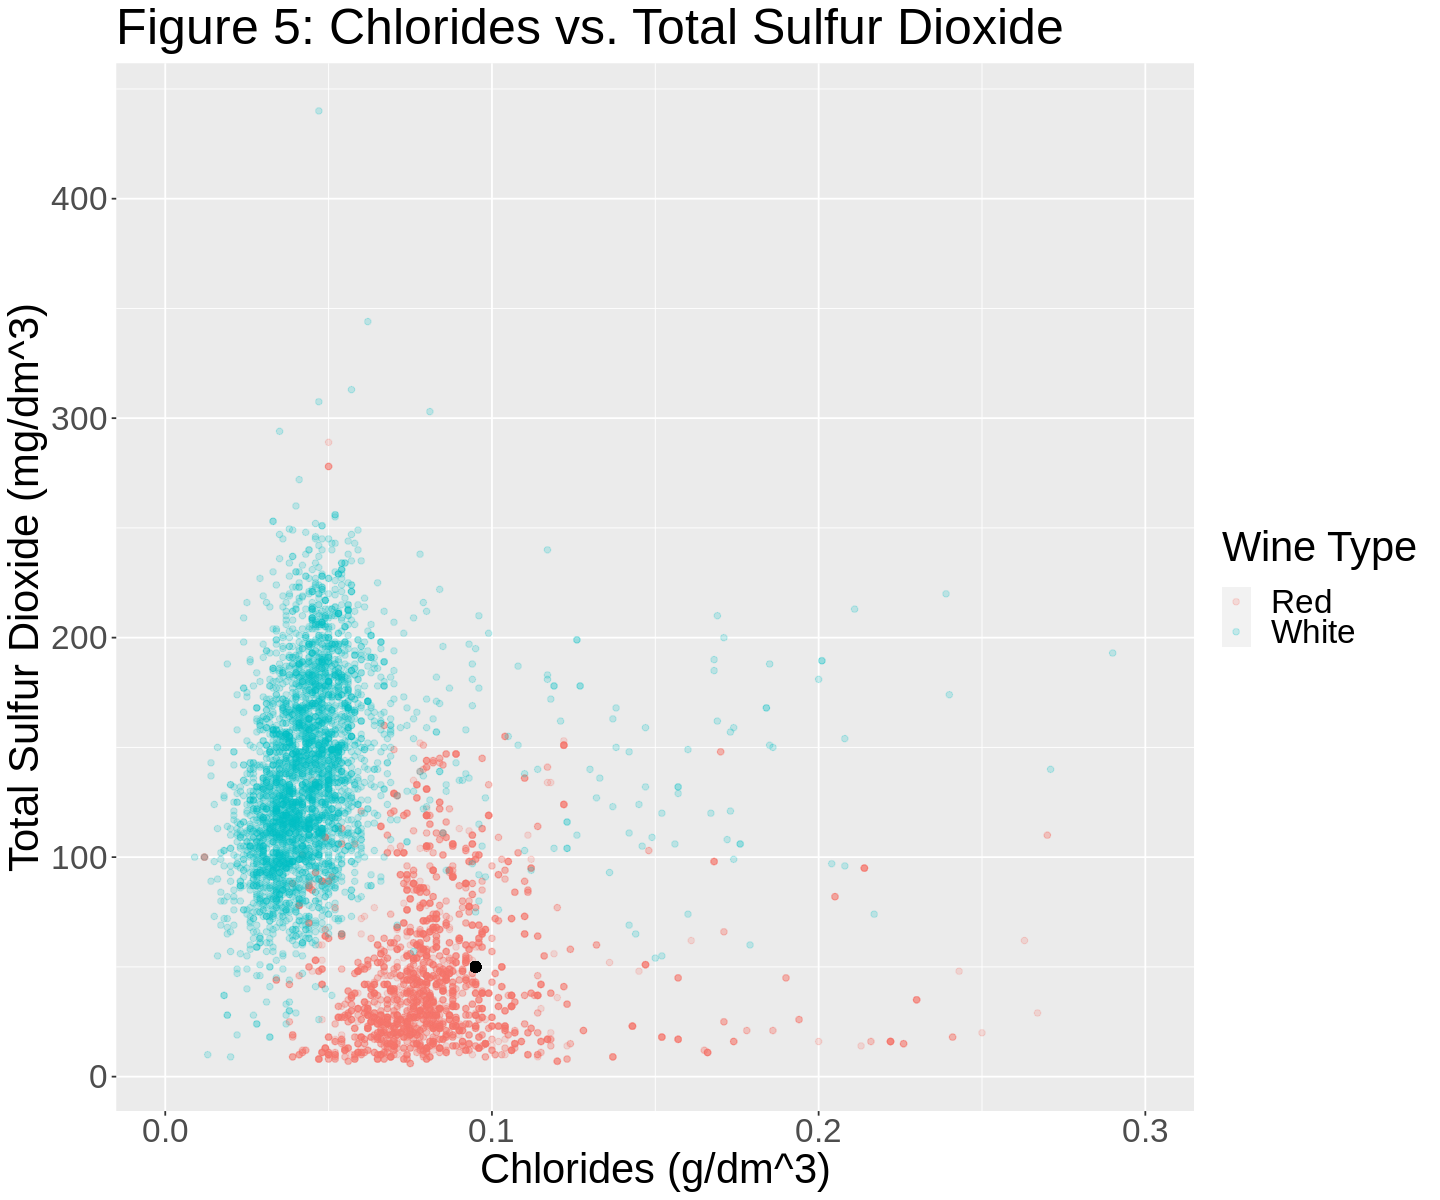

In [21]:
cab_sauv <- data.frame("chlorides" = c(0.095), "total.sulfur.dioxide" = c(50), "type" = "Red")
cab_sauv

cab_sauv_prediction <- predict(wine_fit, cab_sauv) %>%
                      bind_cols(cab_sauv)
cab_sauv_prediction

cab_sauv_plot <- ups_wine %>%
    ggplot(aes(x = chlorides, y = total.sulfur.dioxide, colour = type))+
    geom_point(alpha=0.2)+
    labs(x = "Chlorides (g/dm^3)", y = "Total Sulfur Dioxide (mg/dm^3)", colour = "Wine Type")+
    ggtitle("Figure 5: Chlorides vs. Total Sulfur Dioxide") +
    theme(text = element_text(size = 25)) +
    scale_x_continuous(limits= c(0,0.3)) + 
    geom_point(aes(x = 0.095, y = 50), color = "black", size = 2.5)
cab_sauv_plot

The above prediction table and plot shows that our model predicted wine type of Cabernet Sauvignon correctly, suggesting our model *could* be generalized to wine from other countries. However, since there is not a lot of data on this wine type, more samples are needed to confirm this statement.

_____________________________________________________________________________________________________________________
**Discussion**

*Summary of Findings*

Overall, we found that utilizing the physicochemical properties of chloride and total sulfur dioxide content can predict Vinho Verde wine type (red or white), with a high accuracy of 0.969. From our bar plot, we see that a greater proportion of white wine is predicted correctly compared to red. This may be due to the large upsampling of our red wine dataset, making our prediction for unseen red wines not as accurate.

*Comparison to our Expectations*

We expected to predict the wine type based on chlorides and total.sulfur.dioxide with ~80% accuracy since exploratory analysis and research showed notable difference in these properties between red and white wine. Our resulting model ended up being ~97% accurate, which is a lot higher than our expectations. Although this was a high accuracy, it may be due to the effects of upsampling and the fact that we only utilized Vinho Verde wine data, which is very specific. Similar to previous research, our analysis confirmed that chloride and total sulfur dioxide contents are drastically different in red and white wine.

*Impact of our Findings*

Our findings and experiment with Cabernet Sauvignon shows that there is a huge potential for our model to generalize to wine from other countries. However, more data is needed for it to achieve an accuracy as high as our model. This is useful in the selling and certification of wine, as with large volumes of wine, it is difficult to keep track of sales and certification is a long process that can slow down sales of wine. So, using this model can speed up the process of a simple task like classifying wine color.

*Future Questions*

* What other properties can predict wine type?
    - With more properties, it is possible to further improve the accuracy of our model and generalize to wines from other countries.
* Can the same physicochemical properties accurately predict wine type from all regions?
    - Following cabernet sauvignon example, we want to know whether or not our model can accurately predict wines from all regions, as they may differ greatly in physicochemical properties. This will show us whether or not chloride and total sulfur dioxide content are strong enough predictors of wine color.
* Can other wines or other types of alcohol be predicted using physicochemical properties?
    - We are interested in whether or not using physicochemical properties can predict rose or other types of alcohol (such as whiskey, bourbon, etc.), as it can provide insight into the differences in physicochemical properties in different alcohol, differences in amount of these properties, and give us more information on what we are putting into our bodies.
_____________________________________________________________________________________________________________________